# Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

# Pull our first image into Python

### Adding a single image

The process is very simple:
- grab the file path of the image
- read the image as an array using matplotlib.pyplot.imread
- display the image on the figure using .imshow

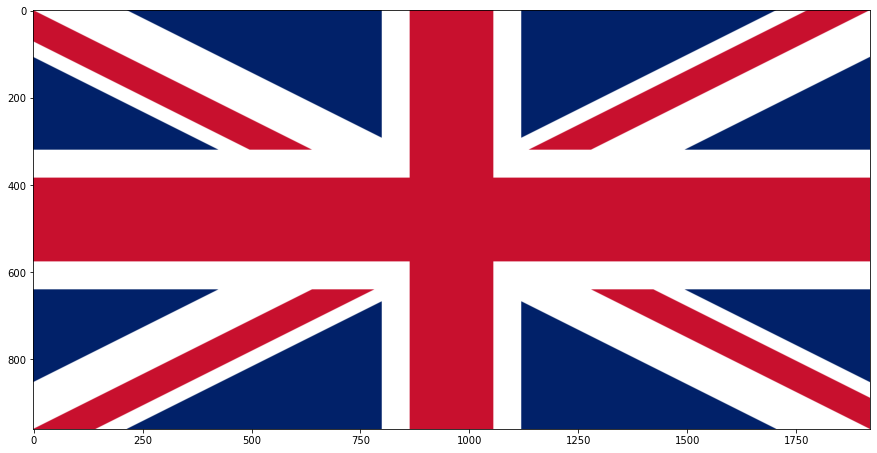

In [2]:
fig, ax = plt.subplots(figsize=(15,8))

path = "flags/{}_flag.png".format('United Kingdom')
img = plt.imread(path)
ax.imshow(img,
          #extent = (0, 20, 0, 2), # (x_min, x_max, y_min, y_max)
          #aspect = 'auto',
          #alpha=0.70 # Make image transparent
         )
plt.show()

# Import and clean the data

In [3]:
df = pd.read_csv('life-expectancy.csv')
df.drop(columns=['Code'], inplace=True)
df = df.rename(columns={'Entity':'country',
              'Year':'year',
              'Life expectancy': 'life expectancy'})

In [4]:
uk = df[df['country'] == 'United Kingdom']
uk.head()

,country,year,life expectancy
17742,United Kingdom,1543,33.939999
17743,United Kingdom,1548,38.820000
17744,United Kingdom,1553,39.590000
17745,United Kingdom,1558,22.379999
17746,United Kingdom,1563,36.660000


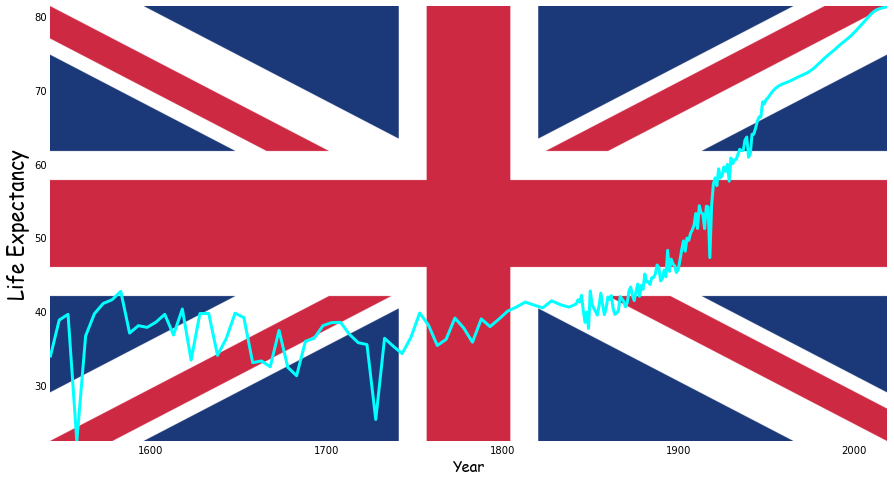

In [5]:
fig, ax = plt.subplots(figsize=(15,8))

path = "flags/{}_flag.png".format('United Kingdom')
img = plt.imread(path)
ax.imshow(img,
          aspect='auto',
          extent=(uk['year'].min(),uk['year'].max(), # stretch the image to fit the data
                  uk['life expectancy'].min(),uk['life expectancy'].max()
                 ),
          alpha=0.9
         )

plt.plot(uk['year'], uk['life expectancy'], color = 'aqua', linewidth=3) # plot the data

# Add y and x labels
plt.ylabel('Life Expectancy', fontsize=20, fontfamily = 'fantasy')
plt.xlabel('Year', fontsize=15, fontfamily = 'fantasy')

# Remove the grid lines
plt.rcParams["axes.grid"] = False

# Remove the border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Remove the axis ticks but keep the labels
ax.tick_params(length=0)

plt.show()

# Pulling interesting Data
I noticed some interesting trends with Cambodia, Rwanda, and Vietnam's life expectancy. So for this activity we will be exploring just those three.

In [6]:
# Pull Cambodia, Rwanda and Vietnam's data into individual dataframes to work with
cam = df[df['country'] == 'Cambodia']
rwa = df[df['country'] == 'Rwanda']
viet = df[df['country'] == 'Vietnam']

# Simple plot of the data

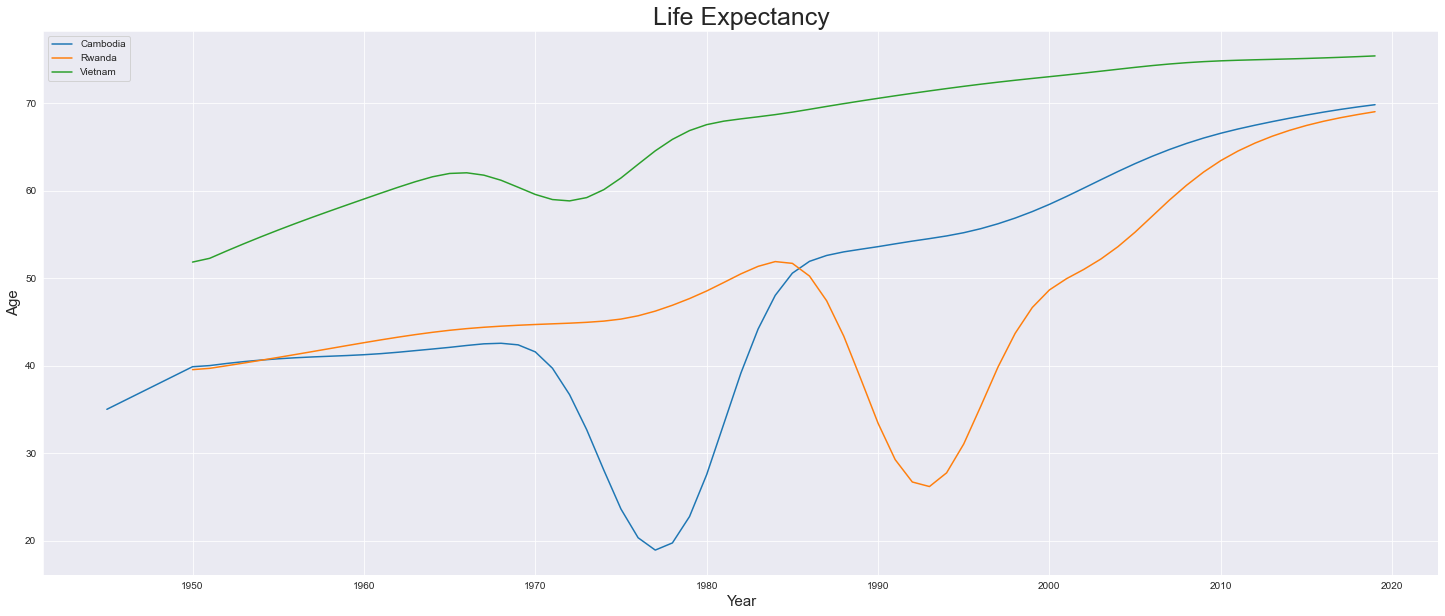

In [7]:
sns.set_style('darkgrid')
# Plot the three dataframes
fig, ax = plt.subplots(figsize=(25,10))
plt.plot(cam['year'], cam['life expectancy'])
plt.plot(rwa['year'], rwa['life expectancy'])
plt.plot(viet['year'], viet['life expectancy'])

# Add title, axis labels, and legend
plt.title("Life Expectancy", fontsize=25)
plt.ylabel("Age", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.legend(['Cambodia', 'Rwanda', 'Vietnam'])
plt.show()

This is nice, but isn't very interesting to look at. Additionally, there is no context for why the lines are behaving as they do.

We can jazz up our infographics with images!

### Adding images to our infographics

The process is generally the same for importing any image:
- grab the file path of the image
- read the image as an array using matplotlib.pyplot.imread
- Use matplotlib.offsetbox.OffsetImage to resize image
- Use matplotlib.offsetbox.AnnotationBbox to place the image in a specific 'box' on the infographic
- Add the image to the array axis 'ax' using add_artist method

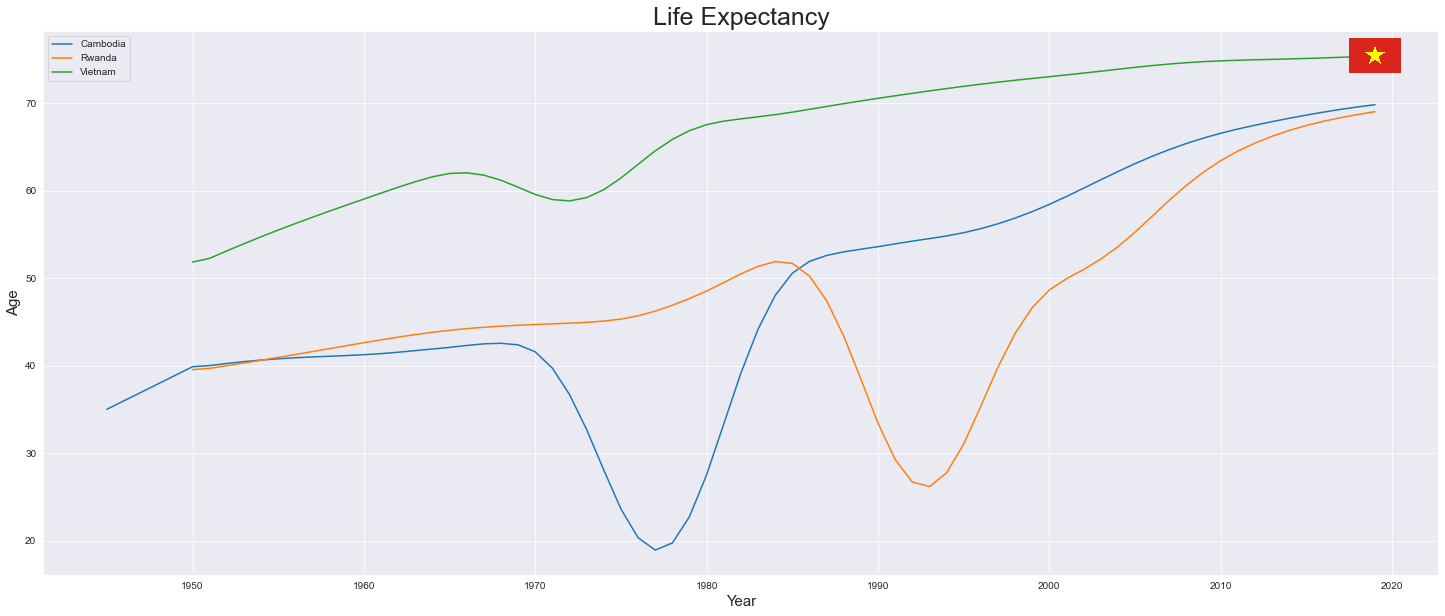

In [8]:
#Adding an image with OffsetImage and AnnotationBbox
path = "flags/{}_flag.png".format('Vietnam') # image file path for Vietnam flag
img = plt.imread(path) # read image from the file path into an array
im = OffsetImage(img, zoom=0.04) # resize the image to better fit our infographic

# add the image using Annotation box
ab = AnnotationBbox(im,
                    (viet['year'][-1:], viet['life expectancy'][-1:]), # x-y axis location of image on figure
                    xybox=(0., 0.), # offset of image from above coordinates
                    frameon=False,
                    xycoords='data',
                    boxcoords="offset points",
                    pad=0)

# Plot (same as above)
fig, ax = plt.subplots(figsize=(25,10))
plt.plot(cam['year'], cam['life expectancy'])
plt.plot(rwa['year'], rwa['life expectancy'])
plt.plot(viet['year'], viet['life expectancy'])

plt.title("Life Expectancy", fontsize=25)
plt.ylabel("Age", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.legend(['Cambodia', 'Rwanda', 'Vietnam'])

# Add the AnnotationBbox we created above
ax.add_artist(ab)
plt.show()

## Generalize the process
Now we can create a few functions to streamline the process. get_flag will simply find the correct file path for each image and create the array. offset_image will then take in coordinates for the location of each image, the name of the country we wish to pull the image for (feeds into get_flag), and generates the AnnotationBbox on our infographic.

In [9]:
def get_flag(name):
    path = "flags/{}_flag.png".format(name)
    im = plt.imread(path)
    return im

def display_img(x, y, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom=0.035)
    im.image.axes = ax

    ab = AnnotationBbox(im, (x, y),  xybox=(0., -10.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=1)

    ax.add_artist(ab)

### Now we can create multiple images with a lot less code

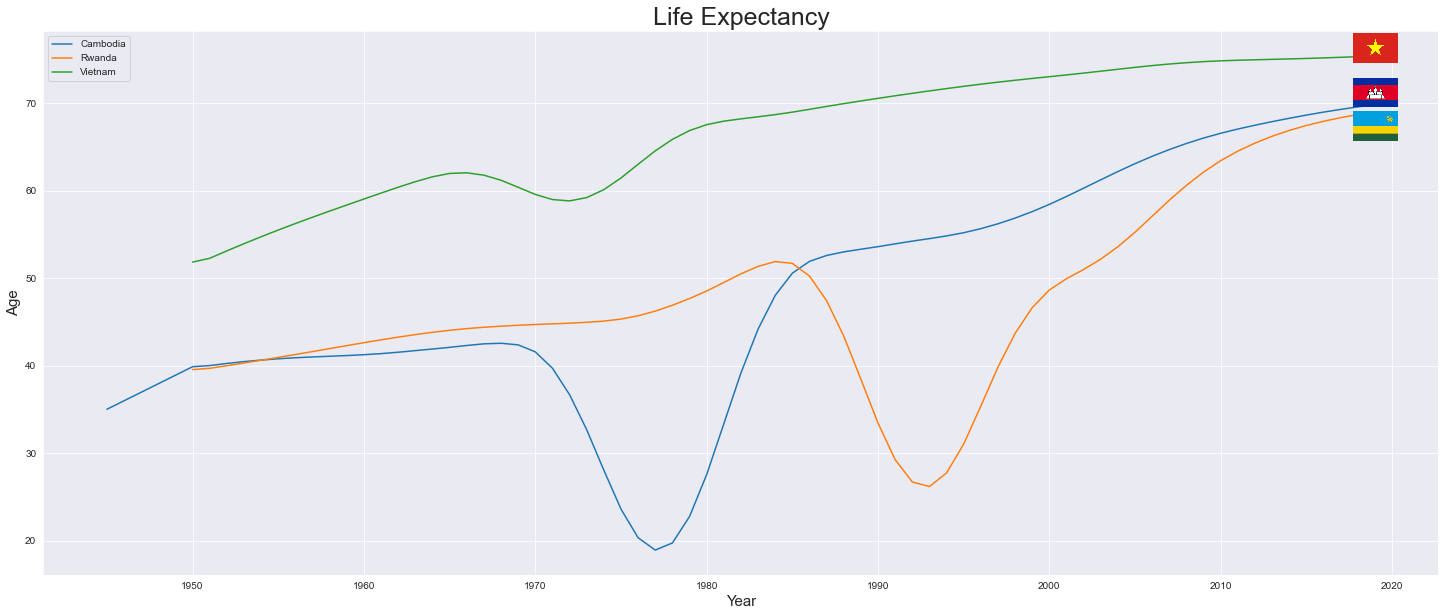

In [10]:
fig, ax = plt.subplots(figsize=(25,10))
plt.plot(cam['year'], cam['life expectancy'])
plt.plot(rwa['year'], rwa['life expectancy'])
plt.plot(viet['year'], viet['life expectancy'])

plt.title("Life Expectancy", fontsize=25)
plt.ylabel("Age", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.legend(['Cambodia', 'Rwanda', 'Vietnam'])


display_img(viet['year'][-1:], viet['life expectancy'][-1:]+2, 'Vietnam', ax)
display_img(rwa['year'][-1:], rwa['life expectancy'][-1:]-0.5, 'Rwanda', ax)
display_img(cam['year'][-1:], cam['life expectancy'][-1:]+2.5, 'Cambodia', ax)

plt.show()

## Annotated text
Now we can add some descriptive text to help us understand these line graphs a little more.

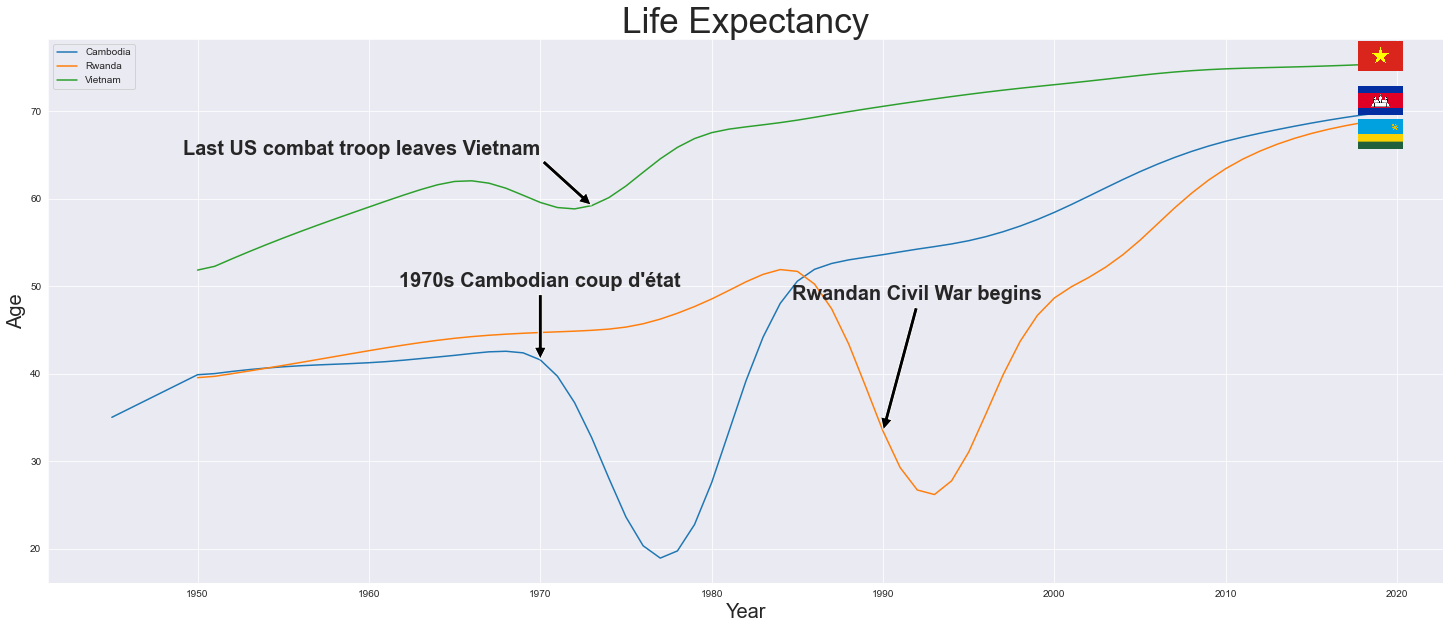

In [11]:
# Plot (same as above)
fig, ax = plt.subplots(figsize=(25,10))
plt.plot(cam['year'], cam['life expectancy'])
plt.plot(rwa['year'], rwa['life expectancy'])
plt.plot(viet['year'], viet['life expectancy'])

plt.title("Life Expectancy", fontsize=35)
plt.ylabel("Age", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.legend(['Cambodia', 'Rwanda', 'Vietnam'])


display_img(viet['year'][-1:], viet['life expectancy'][-1:]+2, 'Vietnam', ax)
display_img(rwa['year'][-1:], rwa['life expectancy'][-1:]-0.5, 'Rwanda', ax)
display_img(cam['year'][-1:], cam['life expectancy'][-1:]+2.5, 'Cambodia', ax)

# Adding some annotations directly to the infographic
# Significant dates in each country
ax.annotate('Last US combat troop leaves Vietnam',
            xy=(1973, 59.2), # coordinates arrow points to
            xytext=(1970, 65), # coordinates of where text will float
            arrowprops=dict(facecolor='black', # build the arorow
                            shrink=0.01),
            horizontalalignment='right', #align text
            fontsize = 20,
            weight = 'bold'
            )

ax.annotate('Rwandan Civil War begins', 
            xy=(1990, rwa[rwa['year'] == 1990]['life expectancy']), 
            xytext=(1992, rwa[rwa['year'] == 1990]['life expectancy'] + 15),
            arrowprops=dict(facecolor='black',
                            shrink=0.01),
            horizontalalignment='center',
            fontsize = 20,
            weight = 'bold'
            )

ax.annotate("1970s Cambodian coup d'état", 
            xy=(1970, cam[cam['year'] == 1970]['life expectancy']),
            xytext=(1970, cam[cam['year'] == 1970]['life expectancy'] + 10),
            arrowprops=dict(facecolor='black',
                            shrink=0.01),
            horizontalalignment='center', 
            verticalalignment='top',
            fontsize = 20,
            weight = 'bold'
            )
plt.show()

# Now you try!

Below is some scaffolding code to make it easy for you to import an image onto a matplotlib visual.

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

##################### START CODING HERE #####################
path = # input the file path of your image here!


img = plt.imread(path)
ax.imshow(img,
          #extent = (0, 0, 0, 0), # adjust the (x_min, x_max, y_min, y_max)
          #aspect = 'auto',
          #alpha=1,
         )
plt.show()

# Place an image on your visual using an AnnotationBbox (Optional)

Below is scaffolding code for you to pull an image onto a matplotlib visual with AnnotationBbox:

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

plt.xlim(0, 10)
plt.ylim(0, 10)

##################### START CODING HERE #####################
path = # input the file path of your image here!


img = plt.imread(path)

##################### Adjust the size of your image #####################
im = OffsetImage(img, zoom=0.2)

##################### Change Arguement values for AnnotationBbox #####################
ab = AnnotationBbox(im,
                    (5,5), # x-y axis location of image on figure
                    xybox=(0., 0.), # offset of image from above coordinates
                    xycoords='data',
                    boxcoords="offset points",
                    pad=0)

ax.add_artist(ab)
plt.show()